In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
sns.set_theme()

In [2]:
#dataset2
os.chdir("C:/Users/antho/Projet_NBA")
df = pd.read_pickle('Nettoyage_données_NBA_DataViz.pkl')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248760 entries, 0 to 248759
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   player_name            248760 non-null  object  
 1   period                 248760 non-null  int8    
 2   action_type            248760 non-null  category
 3   shot_type              248760 non-null  int64   
 4   shot_zone_basic        248760 non-null  object  
 5   shot_zone_area         248760 non-null  object  
 6   shot_zone_range        248760 non-null  object  
 7   shot_distance          248760 non-null  float32 
 8   x_location             248760 non-null  int64   
 9   y_location             248760 non-null  int64   
 10  shot_made_flag         248760 non-null  int8    
 11  position               248760 non-null  int8    
 12  year_game_date         248760 non-null  int32   
 13  age                    248760 non-null  int8    
 14  w_pct_adverse       

In [32]:
# visualisation de graphique

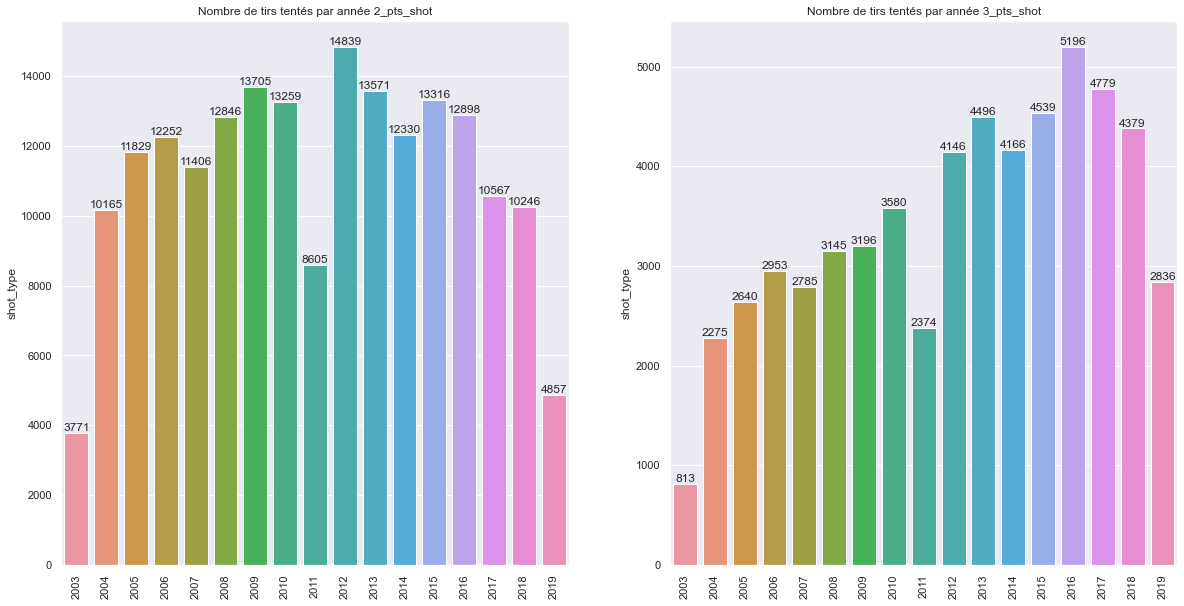

In [9]:
# évolution nombre de tirs tentés que ce soit  à 2 ou à 3 points
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
for i in range(2):
    plt.subplot(1,2,i+1)
    graph = pd.DataFrame(df[df['shot_type'] == df['shot_type'].unique()[i]].groupby(by = 'year_game_date')['shot_type'].value_counts())
    p = sns.barplot(x = np.arange(2003,2020), y = 'shot_type', data = graph)
    p.set_title(label = df['shot_type'].unique()[i])
    plt.xticks(rotation = 90)
    p.set(xlabel = None);
    plt.bar_label(p.containers[0],fmt = '%.f',)
    plt.title('Nombre de tirs tentés par année {}_pts_shot'.format(df['shot_type'].unique()[i]));


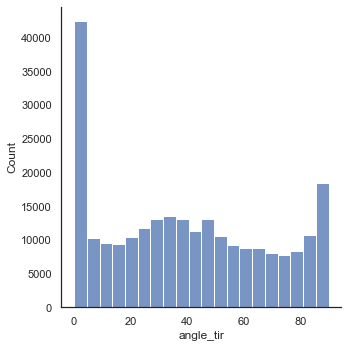

In [33]:
# distribution de variables continues
sns.displot(df['angle_tir'], bins = 20);

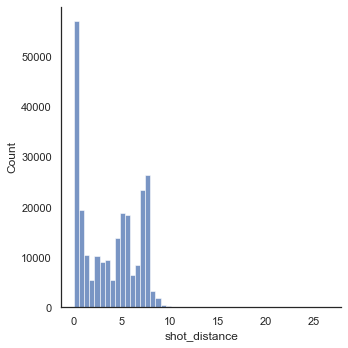

In [59]:
#distribution de la variable shot_distance
sns.displot(data = df['shot_distance'], bins = 50)
#la plupart des données sont en dessous des 10 mètres)
# les données extrêmes sont des shoot au "buzzer" (à la dernière seconde) souvent effectué depuis sa propre partie de terrain

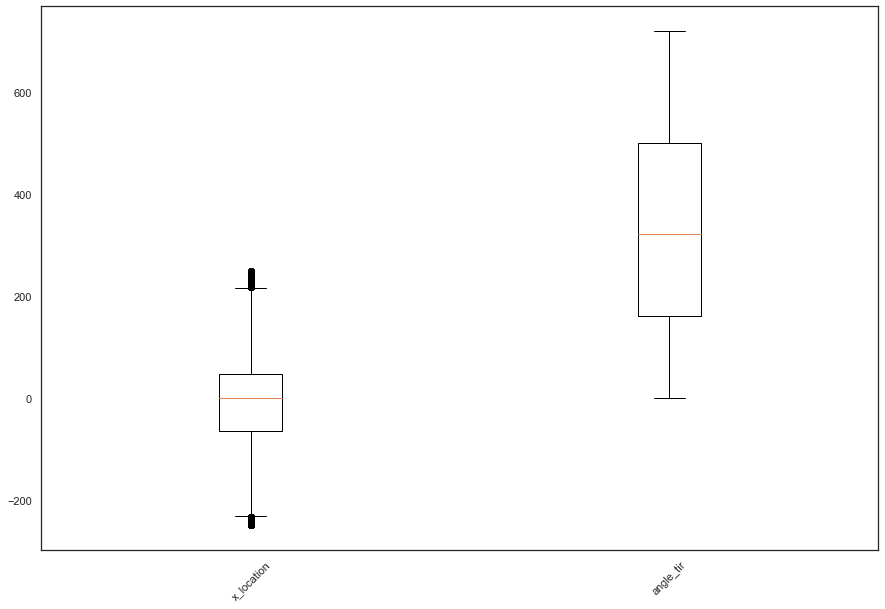

In [48]:
# autre manière de présenter
plt.figure(figsize = (15,10))
plt.boxplot(df.iloc[:,[8,18]].values, labels = list(df.iloc[:,[8,17]].keys()));
plt.xticks(rotation = 45);

C:\Users\antho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


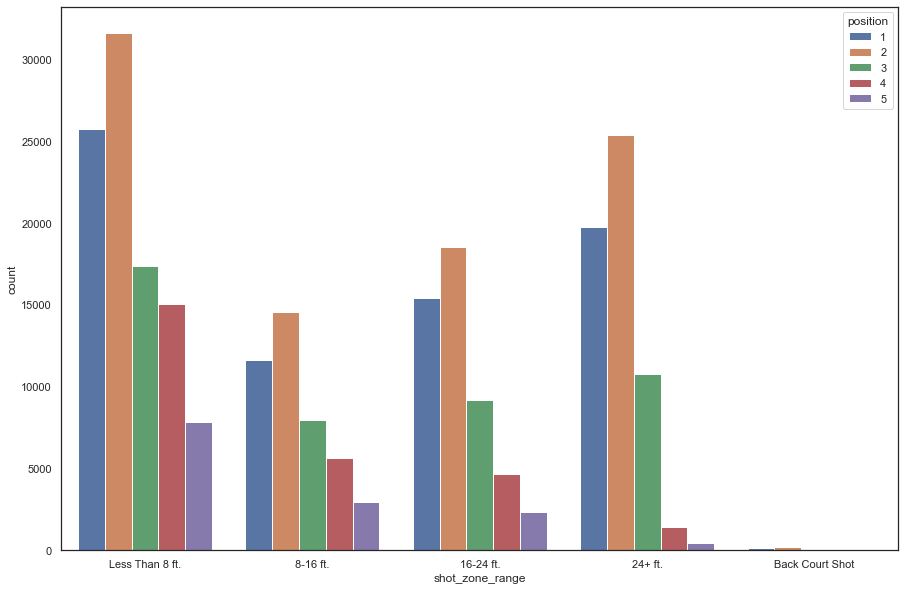

In [34]:
# distribution de variables qualitatives
plt.figure(figsize = (15,10))
sns.countplot(df['shot_zone_range'], hue = df['position']);

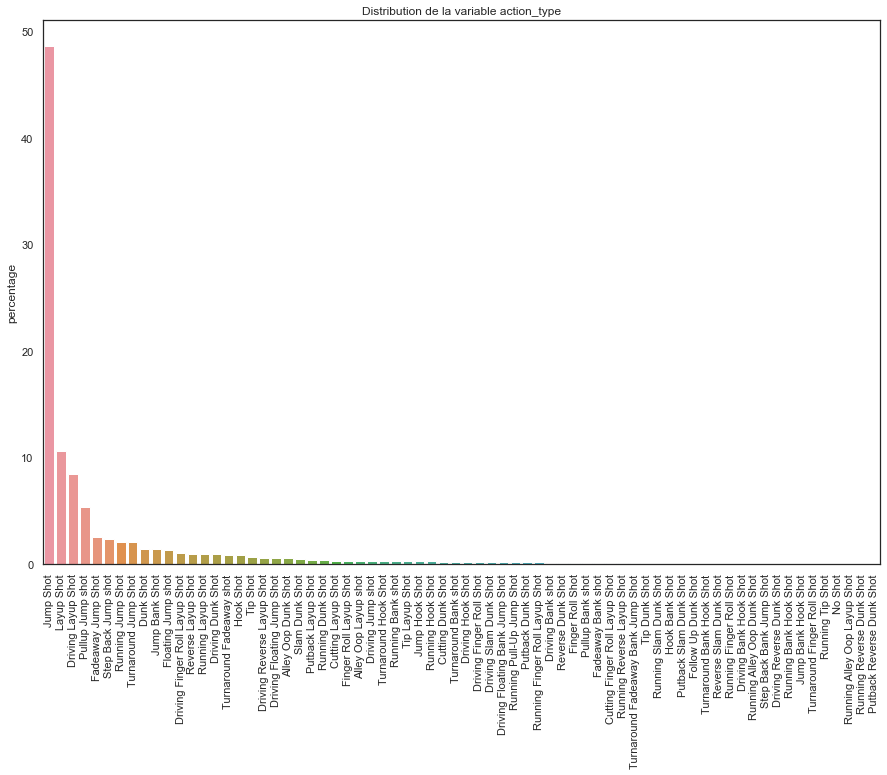

In [56]:
# distribution de la variable action_type
plt.figure(figsize = (15,10))
graph = df['action_type'].value_counts(normalize=True).mul(100).reset_index()\
.rename(columns = {'action_type' : 'percentage', 'index' : 'action_type',})
p = sns.barplot(x="action_type", y="percentage",order = graph.sort_values('percentage', ascending = False)['action_type'], data = graph)
graph = plt.setp(p.get_xticklabels(), rotation=90) 
sns.set_style('white')
plt.xlabel(None)
plt.title('Distribution de la variable action_type');

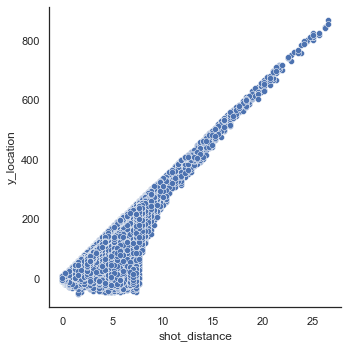

In [35]:
# relation entre deux variables quantitatives scatter plot et lineplot / relplot
sns.relplot(data = df, x = 'shot_distance', y = 'y_location');

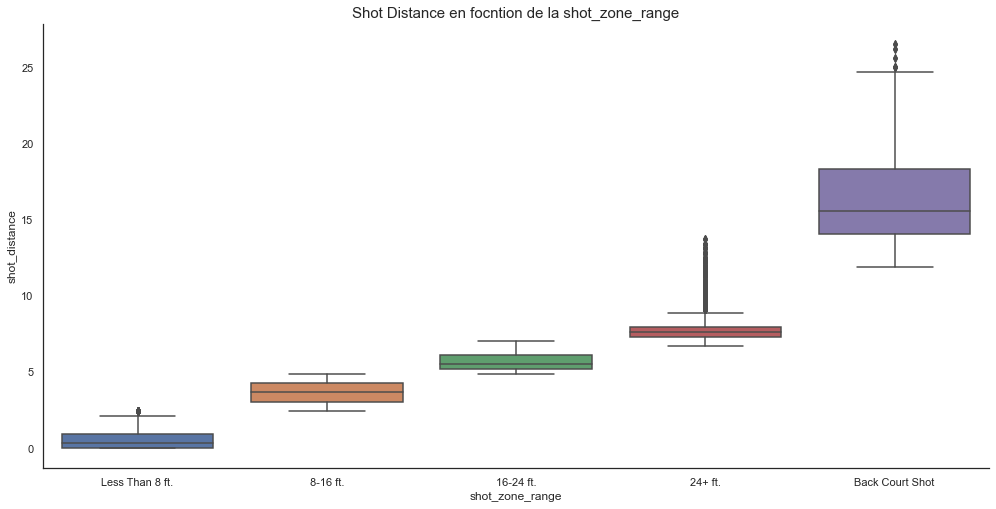

In [36]:
# relation entre une variable qualitative et une variable quantitative catplot (kind = swarm / violin / box / boxen)

sns.catplot(data = df,x = 'shot_zone_range', y = 'shot_distance', kind = 'box', height = 7, aspect = 2)
plt.title('Shot Distance en focntion de la shot_zone_range', fontdict = {'fontsize' : 15});


C:\Users\antho\AppData\Local\Temp\ipykernel_18228\3425543800.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr1,dtype = np.bool)) );


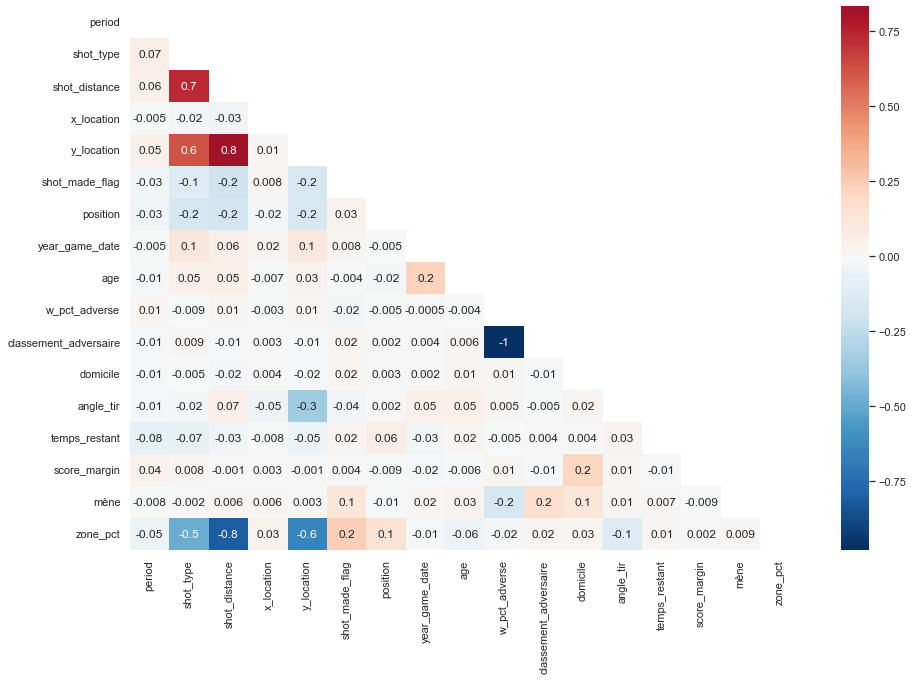

In [49]:
# corrélation entre les différentes variables continues du dataset
corr1 = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(data = corr1, annot = True, cmap = 'RdBu_r', center = 0, fmt = '.1g', 
            mask = np.triu(np.ones_like(corr1,dtype = np.bool)) );

<Figure size 1080x720 with 0 Axes>

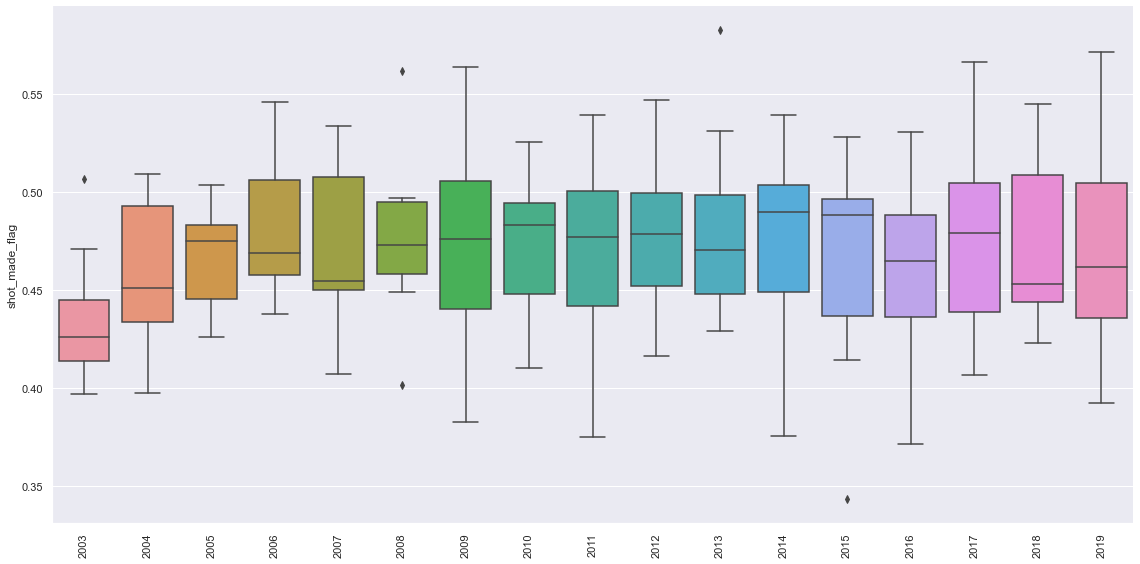

In [14]:
# évolution de la réussite au tir au fil des années
plt.figure(figsize = (15,10))
graph = pd.DataFrame(df.groupby(by = ['year_game_date','player_name'])['shot_made_flag'].mean()).reset_index()
p = sns.catplot(x = 'year_game_date', y = 'shot_made_flag', data = graph, kind = 'box', height = 8, aspect = 2)
plt.xticks(rotation = 90)
p.set(xlabel = None);

<Figure size 1080x720 with 0 Axes>

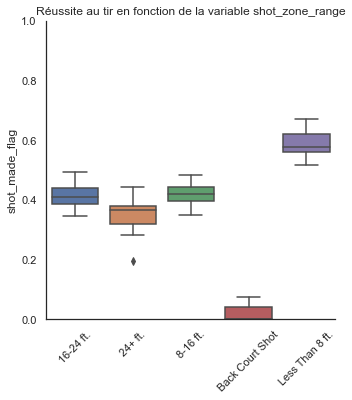

In [46]:
# réussite au tir en fonction de la shot_zone_range
plt.figure(figsize = (15,10));
graph = df.groupby(by = ['shot_zone_range','player_name'])['shot_made_flag'].mean().reset_index().sort_values(by = 'shot_zone_range');
p = sns.catplot(x = 'shot_zone_range', y = 'shot_made_flag', data = graph, kind = 'box');
p.set_xticklabels(['16-24 ft.', '24+ ft.', '8-16 ft.', 'Back Court Shot','Less Than 8 ft.'], rotation = 45);
p.set(xlabel = None);
plt.ylim(0,1);
plt.title('Réussite au tir en fonction de la variable shot_zone_range');

<Figure size 1080x720 with 0 Axes>

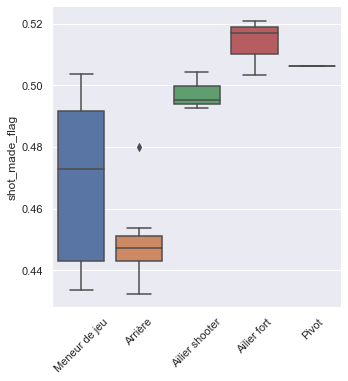

In [98]:
# réussite au tir en fonction du poste du joueur
plt.figure(figsize = (15,10))
graph = df.groupby(by = ['position','player_name'])['shot_made_flag'].mean().reset_index()
p = sns.catplot(x = 'position', y = 'shot_made_flag', 
            data = graph,
            kind = 'box')
p.set_xticklabels(['Meneur de jeu','Arrière','Ailier shooter','Ailier fort','Pivot'], rotation = 45);
p.set(xlabel = None);

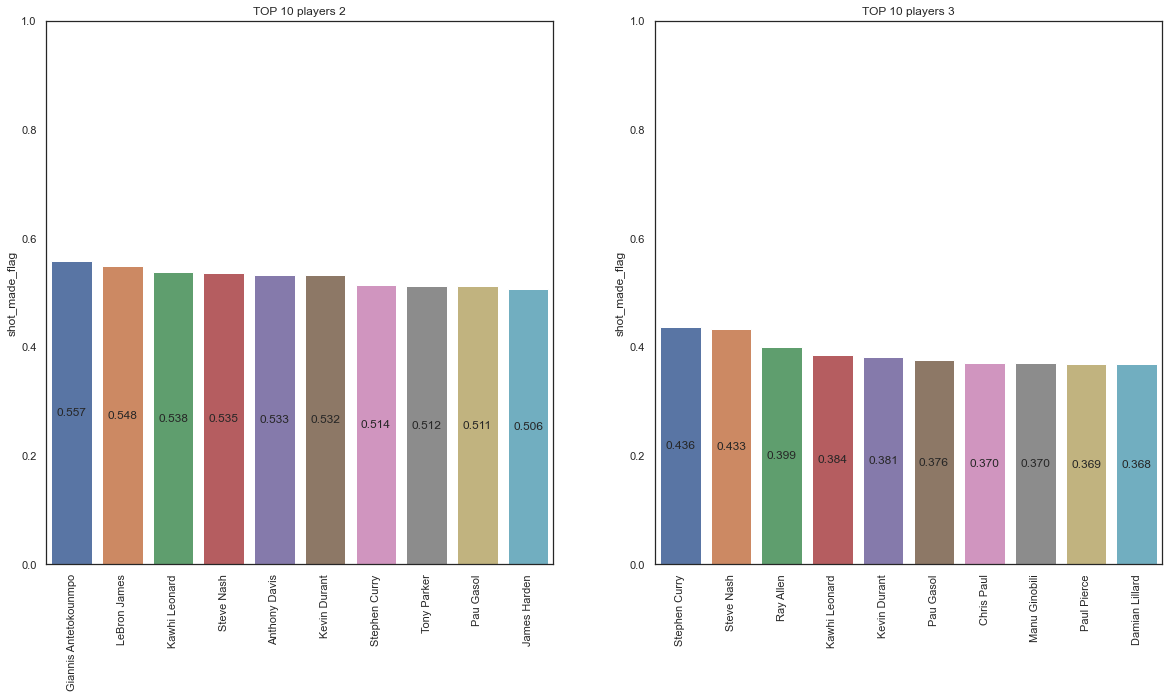

In [37]:
# classement des 5 meileurs joueurs du dataset selon le type de tir, type d'action, zone de tir (ici 2 et pts shot)
plt.figure(figsize = (20,10))
for i in range(2):
    plt.subplot(1,2,i+1)
    graph = pd.DataFrame(df[df['shot_type'] == df['shot_type'].unique()[i]].groupby(by = 'player_name')['shot_made_flag'].mean().reset_index().sort_values(by = 'shot_made_flag',ascending = False).head(10))
    p = sns.barplot(x = 'player_name', y = 'shot_made_flag', data = graph)
    p.set_title(label = df['shot_type'].unique()[i])
    plt.xticks(rotation = 90)
    plt.ylim(0,1)
    p.set(xlabel = None);
    plt.bar_label(p.containers[0],fmt = '%.3f', label_type = 'center')
    plt.title('TOP 10 players {}'.format(df['shot_type'].unique()[i]));



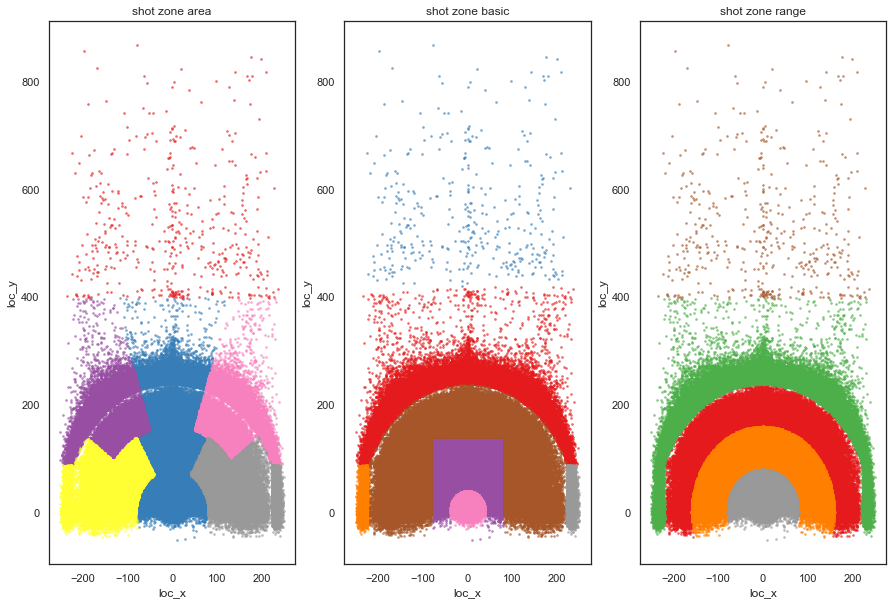

In [29]:
# séparation des zones de tir issues du dataset original

import matplotlib.cm as cm

def grouped_plot (feature):
    groups = df.groupby(feature)
    colors = cm.Set1(np.linspace(0,1,len(groups)))

    for g,c in zip(groups,colors):
        plt.scatter(g[1]['x_location'],g[1]['y_location'], color = c, s = 3, alpha = 0.5)
        
plt.figure(figsize = (15,10))
sns.set_style('white')

plt.subplot(131)
plt.title('shot zone area')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
grouped_plot('shot_zone_area')

plt.subplot(132)
plt.title('shot zone basic')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
grouped_plot('shot_zone_basic')

plt.subplot(133)
plt.title('shot zone range')
plt.xlabel('loc_x')
plt.ylabel('loc_y')
grouped_plot('shot_zone_range')



In [ ]:
#analyse de certaines variables pour voir si elels ont un impact sur la variable cible shot_made_flag

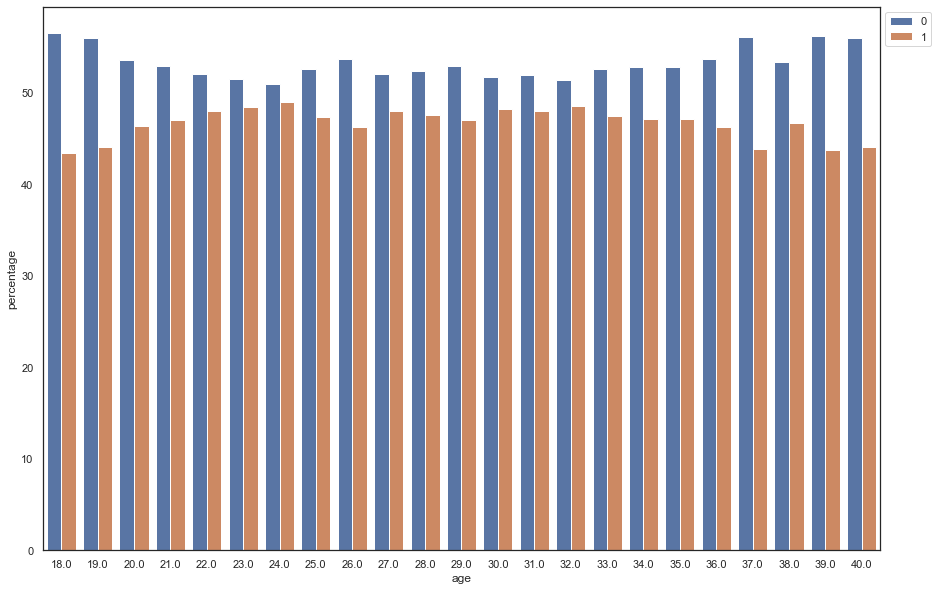

In [39]:
plt.figure(figsize = (15,10))
graph = (df.groupby(['age'])['Shot Made Flag']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('age'))
p = sns.barplot(x="age", y="percentage", hue="Shot Made Flag", data=graph)
graph = plt.setp(p.get_xticklabels(), rotation=0) 
sns.set_style('whitegrid')
plt.legend(bbox_to_anchor=(1, 1), loc=2);

In [109]:
# l'âge semble avoir un impact sur la réussite au shoot (période qui se dégage : 22 - 32 ans)

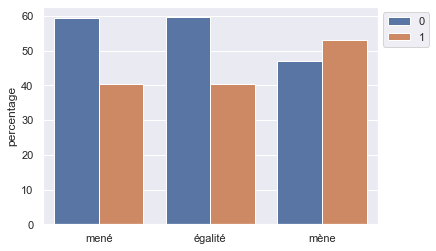

In [24]:
graph = (df.groupby(['mène'])['shot_made_flag']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('mène'))
p = sns.barplot(x="mène", y="percentage", hue="shot_made_flag", data=graph)
graph = plt.setp(p.get_xticklabels(), rotation=0) 
plt.legend(bbox_to_anchor=(1, 1), loc=2);
p.set_xticks(ticks = [0,1,2],labels = ['mené','égalité','mène']);
p.set(xlabel = None);

In [111]:
# être mené (-1) ou mené (1) semble influer sur la réussite du tir
# mettre l'ordonnée en valeur ou en % ne change rien à la visualisation graphique

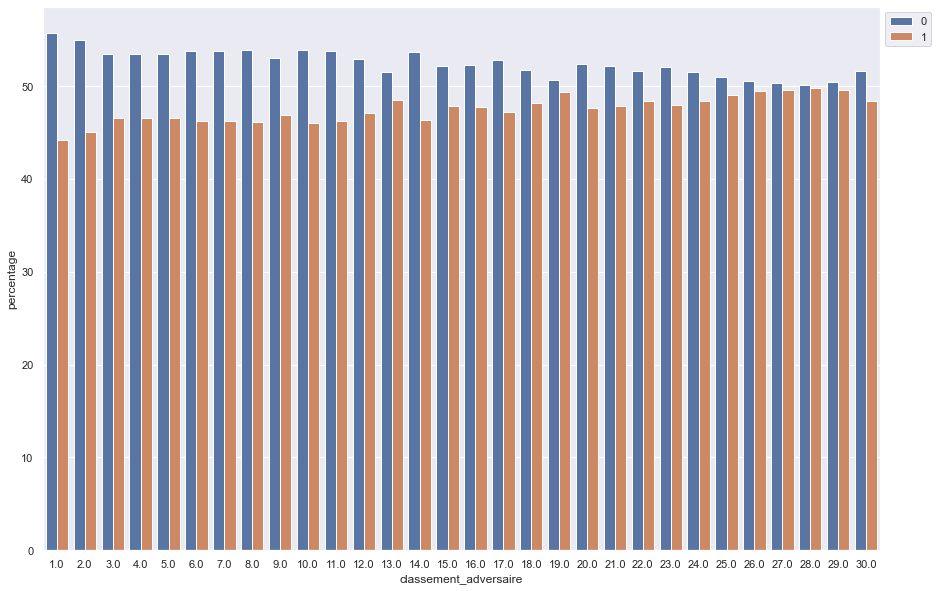

In [112]:
plt.figure(figsize = (15,10))
graph = (df.groupby(['classement_adversaire'])['Shot Made Flag']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('classement_adversaire'))
p = sns.barplot(x="classement_adversaire", y="percentage", hue="Shot Made Flag", data=graph)
graph = plt.setp(p.get_xticklabels(), rotation=0) 
plt.legend(bbox_to_anchor=(1, 1), loc=2);


In [113]:
# le classement de l'équipe adverse semble avoir une importance dans la réussite du tir.

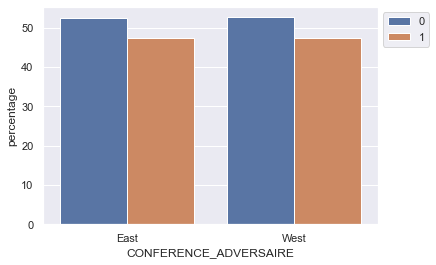

In [114]:
graph = (df.groupby(['CONFERENCE_ADVERSAIRE'])['Shot Made Flag']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('CONFERENCE_ADVERSAIRE'))
p = sns.barplot(x="CONFERENCE_ADVERSAIRE", y="percentage", hue="Shot Made Flag", data=graph)
graph = plt.setp(p.get_xticklabels(), rotation=0) 
plt.legend(bbox_to_anchor=(1, 1), loc=2);

In [115]:
# pas de différence visible entre la conférence de l'équipe adverse et la réussite au shoot

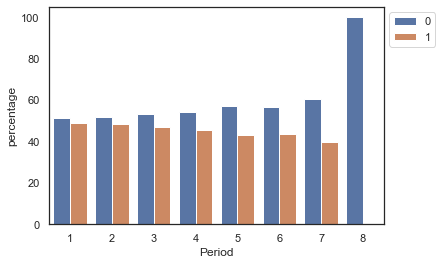

In [57]:
graph = (df.groupby(['Period'])['Shot Made Flag']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Period'))
p = sns.barplot(x="Period", y="percentage", hue="Shot Made Flag", data=graph)
graph = plt.setp(p.get_xticklabels(), rotation=0) 
sns.set_style('white')
plt.legend(bbox_to_anchor=(1, 1), loc=2);


In [117]:
# le quart temps/la période (indirectement la fatigue) semble avoir une influence sur la réussite au shoot

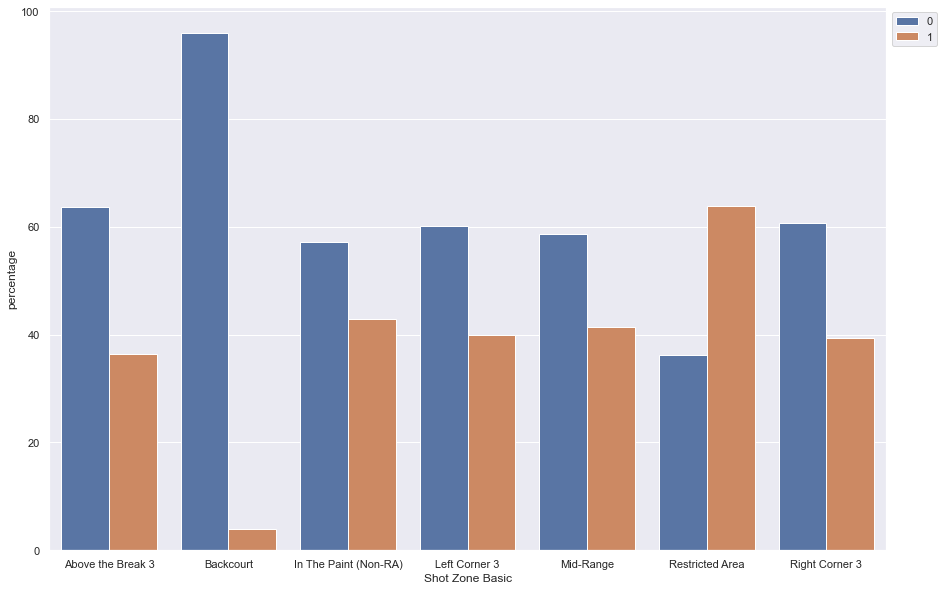

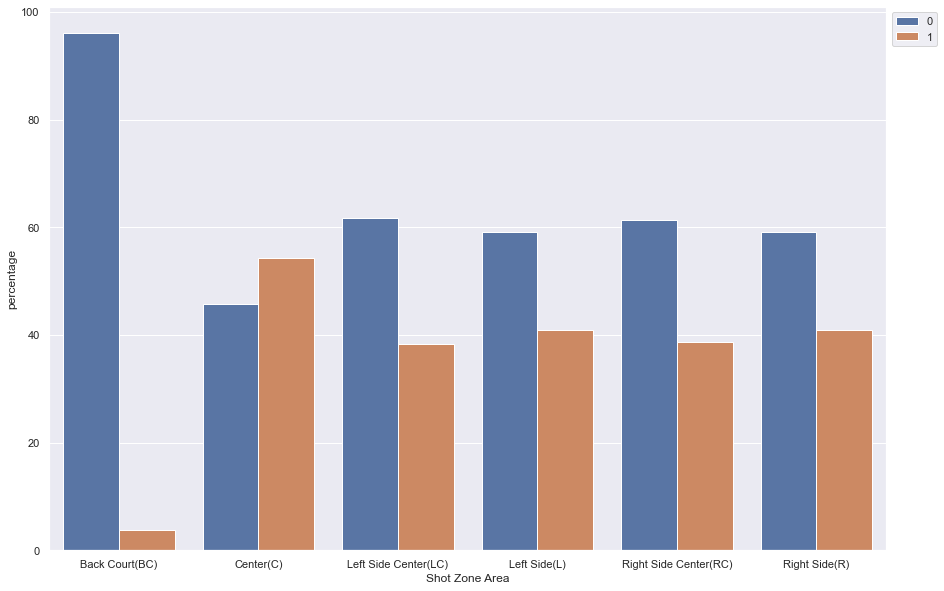

In [118]:
plt.figure(figsize = (15,10))
graph = (df.groupby(['Shot Zone Basic'])['Shot Made Flag']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Shot Zone Basic'))
p = sns.barplot(x="Shot Zone Basic", y="percentage", hue="Shot Made Flag", data=graph)
graph = plt.setp(p.get_xticklabels(), rotation=0) 
plt.legend(bbox_to_anchor=(1, 1), loc=2);

plt.figure(figsize = (15,10))
graph = (df.groupby(['Shot Zone Area'])['Shot Made Flag']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Shot Zone Area'))
p = sns.barplot(x="Shot Zone Area", y="percentage", hue="Shot Made Flag", data=graph)
graph = plt.setp(p.get_xticklabels(), rotation=0) 
plt.legend(bbox_to_anchor=(1, 1), loc=2);

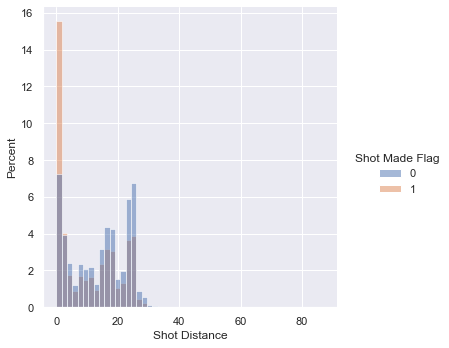

In [119]:
sns.displot(x = 'Shot Distance', hue = 'Shot Made Flag', data = df, bins = 50, stat = 'percent');


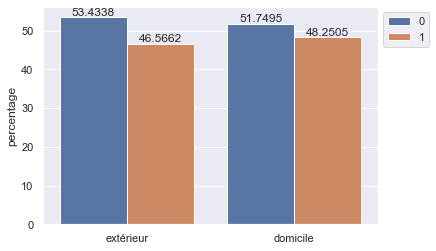

In [124]:
graph = (df.groupby(['domicile'])['Shot Made Flag']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('domicile'))
p = sns.barplot(x="domicile", y="percentage", hue="Shot Made Flag", data=graph)
plt.legend(bbox_to_anchor=(1, 1), loc=2);
p.bar_label(p.containers[0])
p.bar_label(p.containers[1])
p.set_xticks(ticks = [0,1],labels = ['extérieur','domicile'])
p.set(xlabel = None);

In [121]:
# le fait de jouer à domicile (1) ou  l'extérieur (0) semble avoir un impact sur la réussite au shoot

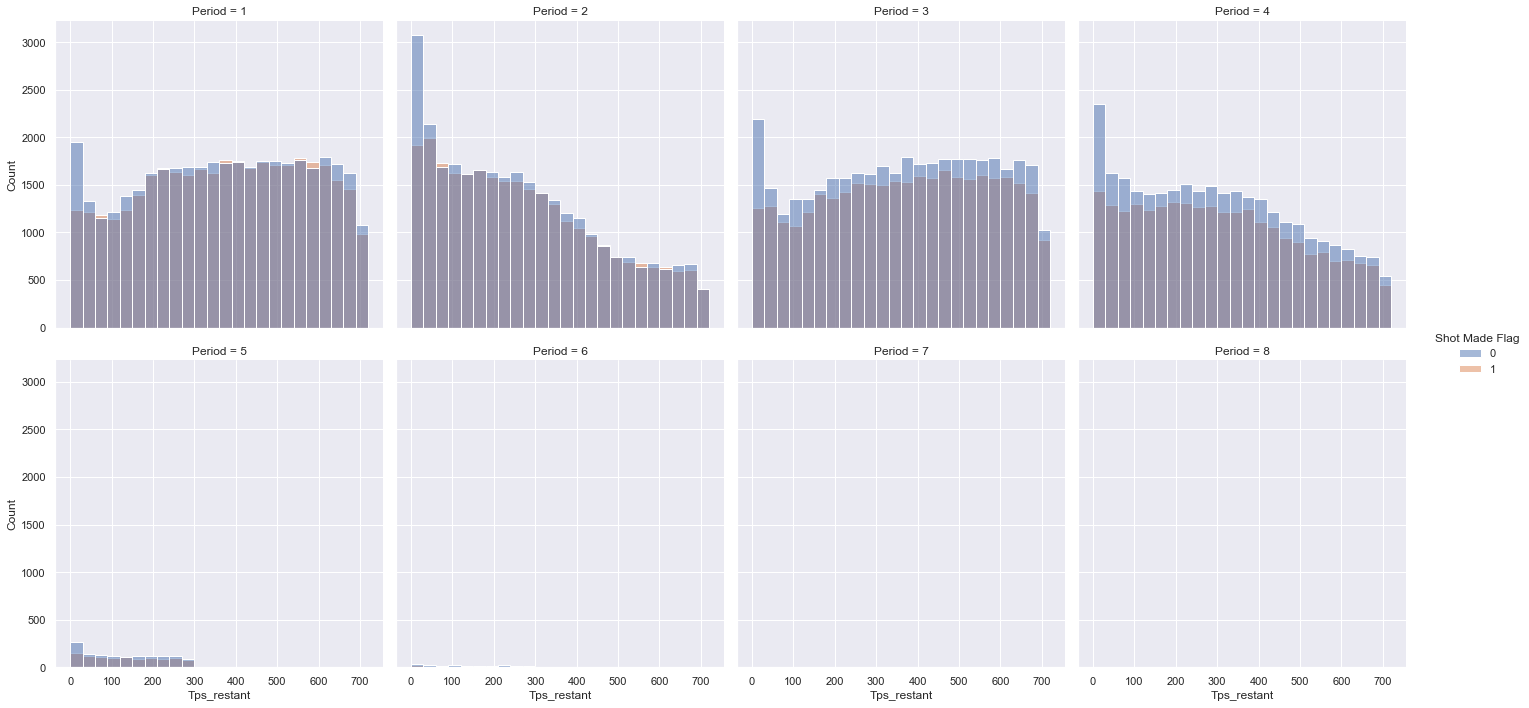

In [123]:
sns.displot(x = 'Tps_restant', bins = 24, hue = 'Shot Made Flag',col = df['Period'],col_wrap = 4, data = df);

In [ ]:
# on peut voir que le temps restant en fonction du quart temps joué a son importance sur la réussite au shoot
# une proportion toujours plus importante de tir loupé lors des 30 dernières secondes car shoot de dernière seconde 